In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
mark=pd.read_excel('time.xlsx')
data=pd.read_excel('data1.xls')
data.head()

,Wav Time,B5-01657-P01-CH0,Frame,State,Q0,Qx,Qy,Qz,Tx,Ty,...,Frame.6,State.6,Q0.6,Qx.6,Qy.6,Qz.6,Tx.6,Ty.6,Tz.6,
0,0.009992,B5-01657-P01-CH0,3049072,OK,0.566167,-0.634326,-0.526390,0,-107.555,96.580,...,3049072,OK,0.581277,0.644985,0.244514,0.431653,-3.767,86.656,-263.011,
1,0.019984,B5-01657-P01-CH0,3049080,OK,0.565362,-0.635815,-0.525457,0,-107.181,96.441,...,3049080,OK,0.581890,0.644466,0.244177,0.431793,-3.753,86.521,-262.998,
2,0.029976,B5-01657-P01-CH0,3049088,OK,0.564820,-0.636543,-0.525159,0,-107.053,96.341,...,3049088,OK,0.580945,0.645340,0.244976,0.431307,-3.710,86.425,-262.979,
3,0.039968,B5-01657-P01-CH0,3049096,OK,0.564889,-0.636362,-0.525304,0,-107.129,96.236,...,3049096,OK,0.580288,0.645924,0.245262,0.431155,-3.564,86.411,-262.949,
4,0.049960,B5-01657-P01-CH0,3049104,OK,0.564384,-0.636350,-0.525860,0,-107.109,96.047,...,3049104,OK,0.579762,0.646404,0.245835,0.430818,-3.552,86.292,-262.936,


In [111]:
mark.head(15)

,发音人,音的名称,起始时间,结束时间,稳定帧
0,1,啊1-1,0.93,1.32,1.08
1,1,啊1-2,1.67,2.06,1.69
2,1,啊1-3,2.40,2.82,2.76
3,1,啊2-1,3.40,3.77,3.69
4,1,啊2-2,4.14,4.51,4.19
5,1,啊2-3,4.89,5.31,4.95
6,1,啊3-1,5.94,6.30,6.15
7,1,啊3-2,6.68,7.02,7.00
8,1,啊3-3,7.37,7.68,7.52
9,1,啊4-1,8.46,8.74,8.71


In [112]:
mark.shape
#data_refer=data.iloc[:,68:71]#取第七组参考点
#data_refer.head()

(96, 5)

In [113]:
data_=data.iloc[:,38:41]#取第4组TxTyTz
data_.head()

,Tx.3,Ty.3,Tz.3
0,-82.469,68.142,-263.398
1,-82.378,68.373,-263.477
2,-82.233,68.508,-263.401
3,-82.155,68.512,-263.195
4,-82.146,68.358,-262.949


In [114]:
markcol_start=mark['起始时间']*100#取第多少行数据
markcol_end=mark['结束时间']*100#取第多少行数据

In [115]:
markcol_start=np.array(markcol_start)
markcol_end=np.array(markcol_end)
markcol_start=markcol_start.astype(np.int32)
markcol_end=markcol_end.astype(np.int32)#时间转行数

In [116]:
for i in range(96):
     locals()['data'+str(i)] = data_.iloc[markcol_start[i]:markcol_end[i],:]

In [117]:
dataA1=[]
dataA2=[]
dataA3=[]
dataA4=[]
dataE1=[]
dataE2=[]
dataE3=[]
dataE4=[]
dataU1=[]
dataU2=[]
dataU3=[]
dataU4=[]
dataI1=[]
dataI2=[]
dataI3=[]
dataI4=[]
dataYU1=[]
dataYU2=[]
dataYU3=[]
dataYU4=[]
dataZHI1=[]
dataZHI2=[]
dataZHI3=[]
dataZHI4=[]
dataZI1=[]
dataZI2=[]
dataZI3=[]
dataZI4=[]

In [118]:
# # 以下是发音字典类型标准文件的结构，
# pronounce_dict = {
#     "啊": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
#     "鹅": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
#     "乌": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
#     "衣": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
#     "于": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
#     "知": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
#     "资": {
#         "one": "",
#         "two": "",
#         "three": "",
#         "four": ""
#     },
# }

In [119]:
# for i in range(3):
#     #
#     pronounce_dict['啊']['one']= data1
#     pronounce_dict['啊']['two']= data2
#     pronounce_dict['啊']['three']= data3
#     #
#     pronounce_dict['鹅']['one']= 8
#     pronounce_dict['鹅']['two']= 8
#     pronounce_dict['鹅']['three']= 8
#     #
#     pronounce_dict['乌']['one']= 8
#     pronounce_dict['乌']['two']= 8
#     pronounce_dict['乌']['three']= 8
#     #
#     pronounce_dict['衣']['one']= 8
#     pronounce_dict['衣']['two']= 8
#     pronounce_dict['衣']['three']= 8
#     #
#     pronounce_dict['于']['one']= 8
#     pronounce_dict['于']['two']= 8
#     pronounce_dict['于']['three']= 8
#     #
#     pronounce_dict['知']['one']= 8
#     pronounce_dict['知']['two']= 8
#     pronounce_dict['知']['three']= 8
#     #
#     pronounce_dict['资']['one']= 8
#     pronounce_dict['资']['two']= 8
#     pronounce_dict['资']['three']= 9

In [141]:
l=(max(data1['Tx.3'])-min(data1['Tx.3'])+max(data2['Tx.3'])-min(data2['Tx.3'])+max(data3['Tx.3'])-min(data3['Tx.3']))/3

1.954666666666668

In [145]:
dataA1=(
        max(data1['Tx.3'])-min(data1['Tx.3'])+
        max(data2['Tx.3'])-min(data2['Tx.3'])+
        max(data3['Tx.3'])-min(data3['Tx.3'])
        )/3
dataA2=(
        max(data4['Tx.3'])-min(data4['Tx.3'])+
        max(data5['Tx.3'])-min(data5['Tx.3'])+
        max(data6['Tx.3'])-min(data6['Tx.3'])
        )/3
dataA3=(
        max(data7['Tx.3'])-min(data7['Tx.3'])+
        max(data8['Tx.3'])-min(data8['Tx.3'])+
        max(data9['Tx.3'])-min(data9['Tx.3'])
        )/3
dataA4=(
        max(data10['Tx.3'])-min(data10['Tx.3'])+
        max(data11['Tx.3'])-min(data11['Tx.3'])+
        max(data12['Tx.3'])-min(data12['Tx.3'])
        )/3
dataA1

1.954666666666668

In [149]:
for i in range(4): 
    locals()['dataA'+str(i+1)]=(
        max(locals()['data'+str(3*i+1)]['Tx.3'])-min(locals()['data'+str(3*i+1)]['Tx.3'])+
        max(locals()['data'+str(3*i+2)]['Tx.3'])-min(locals()['data'+str(3*i+2)]['Tx.3'])+
        max(locals()['data'+str(3*i+3)]['Tx.3'])-min(locals()['data'+str(3*i+3)]['Tx.3'])
        )/3
    print(locals()['dataA'+str(i+1)])


1.954666666666668
3.132333333333326
4.941666666666663
2.101666666666669


In [120]:

dataA1.append(data1)
dataA2.append(locals()['data'+str(i)])
dataA3.append(locals()['data'+str(i)])
dataA4.append(locals()['data'+str(i)])
#A1=1  2  3
#A2=4  5  6
#A3=7  8  9
#A4=10 11 12

dataE1.append(locals()['data'+str(i+12)])
dataE2.append(locals()['data'+str(i+12)])
dataE3.append(locals()['data'+str(i+12)])
dataE4.append(locals()['data'+str(i+12)])

dataU1.append(locals()['data'+str(i+24)])
dataU2.append(locals()['data'+str(i+24)])
dataU3.append(locals()['data'+str(i+24)])
dataU4.append(locals()['data'+str(i+24)])

dataI1.append(locals()['data'+str(i+36)])
dataI2.append(locals()['data'+str(i+36)])
dataI3.append(locals()['data'+str(i+36)])
dataI4.append(locals()['data'+str(i+36)])

dataYU1.append(locals()['data'+str(i+48)])
dataYU2.append(locals()['data'+str(i+48)])
dataYU3.append(locals()['data'+str(i+48)])
dataYU4.append(locals()['data'+str(i+48)])

dataZHI1.append(locals()['data'+str(i+60)])
dataZHI2.append(locals()['data'+str(i+60)])
dataZHI3.append(locals()['data'+str(i+60)])
dataZHI4.append(locals()['data'+str(i+60)])

dataZI1.append(locals()['data'+str(i+72)])
dataZI2.append(locals()['data'+str(i+72)])
dataZI3.append(locals()['data'+str(i+72)])
dataZI4.append(locals()['data'+str(i+72)])

In [121]:
def displacement(x,label):
    maxinmax=[]
    mininmin=[]

    print("最大数据",x[i][label].max())
    maxinmax.append(x[i][label].max())
    mininmin.append(x[i][label].min())
    print("max:",max(maxinmax))
    print("min:",min(mininmin))
    len=max(maxinmax)-min(mininmin)
    print(len)
    return len

In [122]:
def ThisMax(x,label):
    maxinmax=[]
    mininmin=[]

    print("最大数据",x[i][label].max())
    maxinmax.append(x[i][label].max())
    mininmin.append(x[i][label].min())
    return max(maxinmax)
def ThisMin(x,label):
    maxinmax=[]
    mininmin=[]
    print("最小数据",x[i][label].max())
    maxinmax.append(x[i][label].max())
    mininmin.append(x[i][label].min())
    return min(maxinmax)

In [123]:
chineseList=[
    dataA1,dataA2,dataA3,dataA4,
    dataE1,dataE2,dataE3,dataE4,
    dataU1,dataU2,dataU3,dataU4,
    dataI1,dataI2,dataI3,dataI4,
    dataYU1,dataYU2,dataYU3,dataYU4,
    dataZHI1,dataZHI2,dataZHI3,dataZHI4,
    dataZI1,dataZI2,dataZI3,dataZI4
]

In [124]:
chineseListName=[
    'dataA1','dataA2','dataA3','dataA4',
    'dataE1','dataE2','dataE3','dataE4',
    'dataU1','dataU2','dataU3','dataU4',
    'dataI1','dataI2','dataI3','dataI4',
    'dataYU1','dataYU2','dataYU3','dataYU4',
    'dataZHI1','dataZHI2','dataZHI3','dataZHI4',
    'dataZI1','dataZI2','dataZI3','dataZI4'
]

In [125]:
#最值求散点
xlistmax=[]
xlistmin=[]
ylistmax=[]
ylistmin=[]
for i in range(28): 
    print(chineseListName[i])
    #xlist.append(displacement(chineseList[i],'Tx.3'))
    xlistmax.append(ThisMax(chineseList[i],'Tx.3'))
    xlistmin.append(ThisMin(chineseList[i],'Tx.3'))
    ylistmax.append(ThisMax(chineseList[i],'Ty.3'))
    ylistmin.append(ThisMin(chineseList[i],'Ty.3'))

dataA1
最大数据 -87.26
最小数据 -87.26
最大数据 71.547
最小数据 71.547
dataA2
最大数据 -87.527
最小数据 -87.527
最大数据 69.312
最小数据 69.312
dataA3
最大数据 -86.678
最小数据 -86.678
最大数据 68.573
最小数据 68.573
dataA4
最大数据 -88.61
最小数据 -88.61
最大数据 64.798
最小数据 64.798
dataE1
最大数据 -83.974
最小数据 -83.974
最大数据 69.413
最小数据 69.413
dataE2
最大数据 -84.604
最小数据 -84.604
最大数据 69.643
最小数据 69.643
dataE3
最大数据 -87.468
最小数据 -87.468
最大数据 66.833
最小数据 66.833
dataE4
最大数据 -85.049
最小数据 -85.049
最大数据 69.902
最小数据 69.902
dataU1
最大数据 -94.048
最小数据 -94.048
最大数据 56.621
最小数据 56.621
dataU2
最大数据 -93.716
最小数据 -93.716
最大数据 58.329
最小数据 58.329
dataU3
最大数据 -98.609
最小数据 -98.609
最大数据 55.321
最小数据 55.321
dataU4
最大数据 -98.966
最小数据 -98.966
最大数据 56.836
最小数据 56.836
dataI1


IndexError: list index out of range

In [ ]:
xlist=[]
for i in range(28): 
    print(chineseListName[i])
    xlist.append(displacement(chineseList[i],'Tx.3'))
ylist=[]
for i in range(28): 
    print(chineseListName[i])
    ylist.append(displacement(chineseList[i],'Ty.3'))


dataA1
最大数据 -87.26
最大数据 -87.527
最大数据 -86.678
max: -86.678
min: -90.023
3.344999999999999
dataE1
最大数据 -85.962
最大数据 -87.128
最大数据 -87.327
max: -85.962
min: -91.018
5.055999999999997
dataU1
最大数据 -97.925
最大数据 -95.956
最大数据 -96.077
max: -95.956
min: -99.479
3.522999999999996
dataI1
最大数据 -96.84
最大数据 -89.88
最大数据 -90.657
max: -89.88
min: -99.814
9.933999999999997
dataYU1
最大数据 -104.74
最大数据 -100.365
最大数据 -99.327
max: -99.327
min: -108.546
9.219000000000008
dataZHI1
最大数据 -108.007
最大数据 -106.917
最大数据 -104.977
max: -104.977
min: -114.434
9.456999999999994
dataZI1
最大数据 -96.292
最大数据 -97.354
最大数据 -96.46
max: -96.292
min: -102.534
6.242000000000004
dataA2
最大数据 -87.26
最大数据 -87.527
最大数据 -86.678
max: -86.678
min: -90.023
3.344999999999999
dataE2
最大数据 -85.962
最大数据 -87.128
最大数据 -87.327
max: -85.962
min: -91.018
5.055999999999997
dataU2
最大数据 -97.925
最大数据 -95.956
最大数据 -96.077
max: -95.956
min: -99.479
3.522999999999996
dataI2
最大数据 -96.84
最大数据 -89.88
最大数据 -90.657
max: -89.88
min: -99.814
9.933999999999997
dataYU2

In [ ]:
#归一化
arr = np.asarray(xlistmax)
X=[]
for x in arr:
    x = float(x - np.min(arr))/(np.max(arr)- np.min(arr))
    X.append(x)
print(X)
arr = np.asarray(ylistmax)
Y=[]
for y in arr:
    y = float(y - np.min(arr))/(np.max(arr)- np.min(arr))
    Y.append(y)
print(Y)

[0.963935610360128, 1.0, 0.5222371272314521, 0.874316376018987, 0.5504591889381901, 0.0, 0.36446187183985124, 0.963935610360128, 1.0, 0.5222371272314521, 0.874316376018987, 0.5504591889381901, 0.0, 0.36446187183985124, 0.963935610360128, 1.0, 0.5222371272314521, 0.874316376018987, 0.5504591889381901, 0.0, 0.36446187183985124, 0.963935610360128, 1.0, 0.5222371272314521, 0.874316376018987, 0.5504591889381901, 0.0, 0.36446187183985124]
[0.1475615887380591, 0.16232133879192687, 0.0, 0.8143000790059611, 0.7241255476549594, 1.0, 0.9304747540041656, 0.1475615887380591, 0.16232133879192687, 0.0, 0.8143000790059611, 0.7241255476549594, 1.0, 0.9304747540041656, 0.1475615887380591, 0.16232133879192687, 0.0, 0.8143000790059611, 0.7241255476549594, 1.0, 0.9304747540041656, 0.1475615887380591, 0.16232133879192687, 0.0, 0.8143000790059611, 0.7241255476549594, 1.0, 0.9304747540041656]


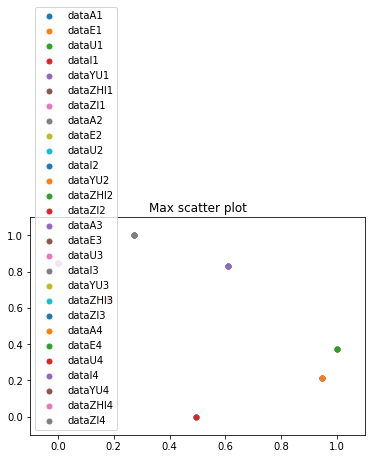

In [ ]:
plt.xlim(xmax=1.1,xmin=-0.1)
plt.ylim(ymax=1.1,ymin=-0.1)
# clist=['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']
for i in range(28):
    plt.scatter(X[i],Y[i],marker = '.',label = chineseListName[i],s = 100,cmap='coolwarm', ) 
plt.legend(loc='lower left')
plt.title("Max scatter plot")
plt.show()

In [ ]:
#归一化
arr = np.asarray(xlistmin)
X=[]
for x in arr:
    x = float(x - np.min(arr))/(np.max(arr)- np.min(arr))
    X.append(x)
print(X)
arr = np.asarray(ylistmin)
Y=[]
for y in arr:
    y = float(y - np.min(arr))/(np.max(arr)- np.min(arr))
    Y.append(y)
print(Y)

[0.9467631337400786, 1.0, 0.4941417850008099, 0.6089304033259538, 0.18238756006695103, 0.0, 0.2719075643863723, 0.9467631337400786, 1.0, 0.4941417850008099, 0.6089304033259538, 0.18238756006695103, 0.0, 0.2719075643863723, 0.9467631337400786, 1.0, 0.4941417850008099, 0.6089304033259538, 0.18238756006695103, 0.0, 0.2719075643863723, 0.9467631337400786, 1.0, 0.4941417850008099, 0.6089304033259538, 0.18238756006695103, 0.0, 0.2719075643863723]
[0.2131583211797117, 0.37309998379517095, 0.0, 0.8326689353427322, 0.6468643655809432, 0.8501377410468322, 1.0, 0.2131583211797117, 0.37309998379517095, 0.0, 0.8326689353427322, 0.6468643655809432, 0.8501377410468322, 1.0, 0.2131583211797117, 0.37309998379517095, 0.0, 0.8326689353427322, 0.6468643655809432, 0.8501377410468322, 1.0, 0.2131583211797117, 0.37309998379517095, 0.0, 0.8326689353427322, 0.6468643655809432, 0.8501377410468322, 1.0]


In [ ]:
# from bokeh.plotting import figure,show
# p =figure(plot_width=400,plot_height=400)
# p.scatter(X,Y,size=20,marker="circle",color="navy",alpha=0.5)
# show(p)
#另一种方式的散点图

In [ ]:
z = [1,2,3,4,5,6,7]

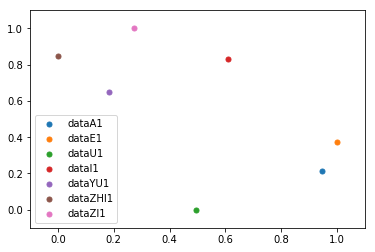

In [ ]:
plt.xlim(xmax=1.1,xmin=-0.1)
plt.ylim(ymax=1.1,ymin=-0.1)
# clist=['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']
for i in range(7):
    plt.scatter(X[i],Y[i],marker = '.',label = chineseListName[i],s = 100,cmap='coolwarm', ) 
plt.legend(loc='lower left')     
plt.show()

In [ ]:
# plt.scatter(X[0],Y[0],marker = '*',
#             label = 'dataA',  #数据标签名称
#             s = 50,           #数据点大小
#     #                 cmap='coolwarm',          #数据点填充颜色
#     #                 edgecolors='m'
#             )